# Megaline Phone Plan Comparison <a class="tocSkip">

# Contents <a class="tocSkip"> <a id='back'></a>

* [Introduction](#introduction)
* [1. Data Overview](#data_overview)
    * [1.1 Initialization](#initialization)
    * [1.2 Load Data](load_data)
* [2. Prepare the Data](#prepare_data)
    * [2.1 `plans` dataframe](#plans_df)
        * [2.1.1 Fix `plans` dataframe](#fix_plans_df)
        * [2.1.2 Enrich `plans` dataframe](#enrich_plans_df)
    * [2.2 `users` dataframe](#users_df)
        * [2.2.1 Fix `users` dataframe](#fix_users_df)
        * [2.2.2 Enrich `users` dataframe](#enrich_users_df)
    * [2.3 `calls` dataframe](#calls_df)
        * [2.3.1 Fix `calls` dataframe](#fix_calls_df)
        * [2.3.2 Enrich `calls` dataframe](#enrich_calls_df)
    * [2.4 `messages` dataframe](#messages_df)
        * [2.4.1 Fix `messages` dataframe](#fix_messages_df)
        * [2.4.2 Enrich `messages` dataframe](#enrich_messages_df)
    * [2.5 `internet` dataframe](#internet_df)
        * [2.5.1 Fix `internet` dataframe](#fix_internet_df)
        * [2.5.2 Enrich `internet` dataframe](#enrich_internet_df)
    * [2.6 Study plan conditions](#study_plan_conditions)
    * [2.7 Aggregate data per user](#aggregate)
* [3. Analysis: Study user behavious](#analysis)
    * [3.1 Calls](#calls)
    * [3.2 Messages](#messages)
    * [3.3 Internet](#internet)
    * [3.4 Revenue](#revenue)
* [4. Test statistical hypothesis](#hypothesis)
* [5. General conclusion](#conclusion)

# Introduction <a class="tocSkip"> <a id='introduction'></a>

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

## Which one is a better plan? <a class="tocSkip">

### Surf <a class="tocSkip">
    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
       1 minute: 3 cents
       1 text message: 3 cents
       1 GB of data: $10

### Ultimate <a class="tocSkip">
    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
       1 minute: 1 cent
       1 text message: 1 cent
       1 GB of data: $7

Five different data files are to be analyzed: `/datasets/megaline_calls.csv`, `/datasets/megaline_internet.csv`, `/datasets/megaline_messages.csv`, `/datasets/megaline_plans.csv`, `/datasets/megaline_users.csv`. These data files will be viewed and edited as necessary regarding format changes and preprocessing.

[Back to Contents](#back)

# Data Overview <a id='data_overview'></a>

## Initialization <a id='initialization'></a>

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from scipy import stats as st

## Load data <a id='load_data'></a>

In [2]:
# Load the data files into different DataFrames

# Reading the `megaline_plans` dataframe file and storing it to plans_df
plans_df = pd.read_csv('/datasets/megaline_plans.csv')

# Reading the `megaline_users` dataframe file and storing it to users_df
users_df = pd.read_csv('/datasets/megaline_users.csv')

# Reading the `megaline_calls` dataframe file and storing it to calls_df
calls_df = pd.read_csv('/datasets/megaline_calls.csv')

# Reading the `megaline_messages` dataframe file and storing it to messages_df
messages_df = pd.read_csv('/datasets/megaline_messages.csv')

# Reading the `megaline_internet` dataframe file and storing it to internet_df
internet_df = pd.read_csv('/datasets/megaline_internet.csv')

# Prepare the data <a id='prepare_data'></a>

## Plans <a id='plans_df'></a>

In [3]:
# Print the general/summary information about the plans' DataFrame
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
display(plans_df.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plans_df is small enough that the entire table can be displayed. There appears to be no missing values, duplicates, or formatting issues. Appropriate data types are used.

### Fix data <a id='fix_plans_df'></a>

No obvious issues with the data need to be fixed given the initial observations

### Enrich data <a id='enrich_plans_df'></a>

No additional factors needed.

## Users <a id='users_df'></a>

In [5]:
# Print the general/summary information about the users' DataFrame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
display(users_df)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [7]:
# checking for duplicated rows
print(users_df.duplicated().sum())
print()

# checking for duplicate user IDs
print(users_df.duplicated(subset='user_id').sum())
print()

# counting the number of missing values
print(users_df.isna().sum())
print()

# checking for implicit duplicates
sorted_cities = sorted(users_df['city'].unique())
print(sorted_cities)

0

0

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

['Albany-Schenectady-Troy, NY MSA', 'Albuquerque, NM MSA', 'Atlanta-Sandy Springs-Roswell, GA MSA', 'Austin-Round Rock-Georgetown, TX MSA', 'Bakersfield, CA MSA', 'Baltimore-Columbia-Towson, MD MSA', 'Baton Rouge, LA MSA', 'Birmingham-Hoover, AL MSA', 'Boston-Cambridge-Newton, MA-NH MSA', 'Bridgeport-Stamford-Norwalk, CT MSA', 'Buffalo-Cheektowaga, NY MSA', 'Cape Coral-Fort Myers, FL MSA', 'Charleston-North Charleston, SC MSA', 'Charlotte-Concord-Gastonia, NC-SC MSA', 'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Cincinnati, OH-KY-IN MSA', 'Cleveland-Elyria, OH MSA', 'Colorado Springs, CO MSA', 'Columbia, SC MSA', 'Columbus, OH MSA', 'Dallas-Fort Worth-Arlington, TX MSA', 'Dayton-Kettering, OH MSA', 'Denver-Aurora-Lakewood, CO MSA', 'Detroit-Warren-Dearborn, MI MSA', 'El Paso, TX MSA', 'Fresno, CA MSA', 'Grand Rapids-Kentwood, 

There appears to be no duplicates or formatting issues and appropriate data types are used, but if calculations are to be done with the dates, they should be converted to datetime instead of being kept as object. 

There are many missing values in the churn_date column, but information about this data file indicates that if the value is missing, the calling plan was being used when this database was extracted). Since the missing values in the churn_date column indicate that the corresponding users have not churned yet, it can be replaced with a value that represents the end of the observation period, i.e., the last date in the dataset. The maximum date in the reg_date column will be used as the replacement value for the missing values in the churn_date column so that the column can be used to calculate any future metrics. 

Also while there are no formatting issues with using 'plan' as the column name, for consistency with the plans_df having the column name 'plan_name', it should be changed so the data frames can potentially be merged during analysis.

### Fix Data <a id='fix_users_df'></a>

In [8]:
# Convert the reg_date column to a pandas datetime format
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])

# Convert the churn_date column to a pandas datetime format
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])

# Replace missing
max_date = users_df['reg_date'].max()
users_df['churn_date'] = users_df['churn_date'].fillna(max_date)

# Renaming plan column to plan_names to match column name in the plans_df for consistency
users_df = users_df.rename(columns={'plan': 'plan_name'})

# Confirm no more missing values and data type was changed successfully
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data <a id='fix_users_df'></a>

No additional factors needed

## Calls <a id='calls_df'></a>

In [9]:
# Print the general/summary information about the calls' DataFrame
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
display(calls_df)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [11]:
# checking for duplicated rows
print(calls_df.duplicated().sum())
print()

# checking for duplicate IDs
print(calls_df.duplicated(subset='id').sum())
print()

# determining number of entries for each unique value in duration column
print(calls_df.value_counts('duration'))
print()

# calculating percentage of duration column that contains 0.0
zero_percentage = 26834/137735*100
print(zero_percentage)

0

0

duration
0.00     26834
8.37       102
4.02       102
3.91       101
4.30       100
         ...  
26.41        1
26.44        1
26.47        1
26.48        1
37.60        1
Length: 2802, dtype: int64

19.482339274694162


There appear to be no duplicate rows, missing values, formatting issues, or inappropriate data types, but if calculations are to be done with the call_date column, it should be converted to datetime instead of being kept as object. 

A large portion, almost 20% of the entries in the duration column are 0.0. While 0 is sometimes used as a placeholder for missing values, there are too many to justify ignoring. Since the data owner cannot be asked for clarification, it is best to keep the data. 

Since Megaline rounds seconds up to minutes for calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. The datafile will need to include a column for the rounded call durations. 

It may also be beneficial during analysis if a month column was added to the data as well.

### Fix data <a id='fix_calls_df'></a>

In [12]:
# Convert the call_date column to a pandas datetime format
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Confirm data type was changed successfully
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data <a id='enrich_calls_df'></a>

In [13]:
# Adding a column showing the duration time rounded up to the nearest integer and replacing the 0.0 values with 1
calls_df['duration_rounded'] = calls_df['duration'].apply(lambda x: math.ceil(x) if x > 0 else 1)

# Add a new column month to the dataframe
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Confirm data type was changed successfully
calls_df.info()

display(calls_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                137735 non-null  object        
 1   user_id           137735 non-null  int64         
 2   call_date         137735 non-null  datetime64[ns]
 3   duration          137735 non-null  float64       
 4   duration_rounded  137735 non-null  int64         
 5   month             137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), period[M](1)
memory usage: 6.3+ MB


,id,user_id,call_date,duration,duration_rounded,month
0,1000_93,1000,2018-12-27,8.52,9,2018-12
1,1000_145,1000,2018-12-27,13.66,14,2018-12
2,1000_247,1000,2018-12-27,14.48,15,2018-12
3,1000_309,1000,2018-12-28,5.76,6,2018-12
4,1000_380,1000,2018-12-30,4.22,5,2018-12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,2018-11
137731,1499_200,1499,2018-10-20,10.89,11,2018-10
137732,1499_201,1499,2018-09-21,8.12,9,2018-09
137733,1499_202,1499,2018-10-10,0.37,1,2018-10


## Messages <a id='messages_df'></a>

In [14]:
# Print the general/summary information about the messages' DataFrame
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Print a sample of data for messages
display(messages_df)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [16]:
# checking for duplicated rows
print(messages_df.duplicated().sum())
print()

# checking for duplicate IDs
print(messages_df.duplicated(subset='id').sum())
print()

0

0



There appears to be no missing values, duplicates, or formatting issues. Appropriate data types are used, but if calculations are to be done with the message_date column, it should be converted to datetime instead of being kept as object. 

It may also be beneficial during analysis if a month column was added to the data as well.

### Fix data <a id='fix_messages_df'></a>

In [17]:
# Convert the call_date column to a pandas datetime format
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Confirm data type was changed successfully
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data <a id='enrich_messages_df'></a>

In [18]:
# Add a new column month to the dataframe
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

display(messages_df)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018-12
76047,1497_536,1497,2018-12-24,2018-12
76048,1497_547,1497,2018-12-31,2018-12
76049,1497_558,1497,2018-12-24,2018-12


## Internet <a id='internet_df'></a>

In [19]:
# Print the general/summary information about the internet DataFrame
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Print a sample of data for the internet traffic
display(internet_df)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [21]:
# checking for duplicated rows
print(internet_df.duplicated().sum())
print()

# checking for duplicate IDs
print(internet_df.duplicated(subset='id').sum())
print()

# determining number of entries for each unique value in mb_used column
print(internet_df.value_counts('mb_used'))
print()

# calculating percentage of duration column that contains 0.0
zero_percentage_mb = 13747/104825*100
print(zero_percentage_mb)

0

0

mb_used
0.00       13747
435.77         8
414.46         8
355.33         7
309.68         7
           ...  
369.32         1
369.35         1
369.36         1
369.37         1
1693.47        1
Length: 57624, dtype: int64

13.11423801574052


There appear to be no duplicate rows, missing values, formatting issues, or inappropriate data types, but if calculations are to be done with the message_date column, it should be converted to datetime instead of being kept as object.

However a large portion, about 13% of the entries in the mb_used column are 0.00. While 0 is sometimes used as a placeholder for missing values, there are too many to justify ignoring. Since the data owner cannot be asked for clarification, it is best to keep the data. 

It may also be beneficial during analysis if a month column was added to the data as well.

### Fix data <a id='fix_internet_df'></a>

In [22]:
# Convert the session_date column to a pandas datetime format
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Confirm data type was changed successfully
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data <a id='enrich_internet_df'></a>

In [23]:
# Add a new column month to the dataframe
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

display(internet_df)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,2018-10
104821,1499_216,1499,2018-12-30,304.72,2018-12
104822,1499_217,1499,2018-09-22,292.75,2018-09
104823,1499_218,1499,2018-12-07,0.00,2018-12


## Study plan conditions <a id='study_plan_conditions'></a>

Print out the plan conditions and make sure they are clear for you

### Surf <a class="tocSkip">
    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
       1 minute: 3 cents
       1 text message: 3 cents
       1 GB of data: $10

### Ultimate <a class="tocSkip">
    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
       1 minute: 1 cent
       1 text message: 1 cent
       1 GB of data: $7

## Aggregate data per user <a id='aggregate'></a>

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls_df.groupby(['user_id', 'month']).size()

calls_per_month = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls')

display(calls_per_month)

,user_id,month,calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45


In [25]:
# Calculate the amount of minutes spent by each user per month. Save the result.

# Group the data by user_id and month and calculate the sum of duration for each group
minutes_per_month = calls_df.groupby(['user_id', 'month']).agg({'duration_rounded': 'sum'})

# Rename the resulting column to total_duration
minutes_per_month = minutes_per_month.rename(columns={'duration_rounded': 'total_duration'})

display(minutes_per_month)

total_duration
user_id month                  
1000    2018-12             124
1001    2018-08             187
        2018-09             326
        2018-10             411
        2018-11             441
...                         ...
1498    2018-12             346
1499    2018-09             352
        2018-10             397
        2018-11             314
        2018-12             505

[2258 rows x 1 columns]

In [26]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages_df.groupby(['user_id', 'month']).size()

messages_per_month = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages')

display(messages_per_month)

,user_id,month,messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [27]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

# group by user_id and month, and sum the mb_used column
user_month_traffic = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# apply the rounding up rule to the traffic column
user_month_traffic['traffic_gb'] = user_month_traffic['mb_used'].apply(lambda x: math.ceil(x / 1024))

display(user_month_traffic)

,user_id,month,mb_used,traffic_gb
0,1000,2018-12,1901.47,2
1,1001,2018-08,6919.15,7
2,1001,2018-09,13314.82,14
3,1001,2018-10,22330.49,22
4,1001,2018-11,18504.30,19
...,...,...,...,...
2272,1498,2018-12,23137.69,23
2273,1499,2018-09,12984.76,13
2274,1499,2018-10,19492.43,20
2275,1499,2018-11,16813.83,17


In [28]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merge_df = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
merge_df = pd.merge(merge_df, messages_per_month, on=['user_id', 'month'], how='outer')
merge_df = pd.merge(merge_df, user_month_traffic, on=['user_id', 'month'], how='outer')

# print the merged dataframe
display(merge_df)

# NaN values in the merged dataframe indicates those users did not use any calls, messages, or data in the given month, and thus can be replaed with 0
merge_df = merge_df.fillna(0)

# confirming no more missing values in merged_df
merge_df.info()

,user_id,month,calls,total_duration,messages,mb_used,traffic_gb
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0
1,1001,2018-08,27.0,187.0,30.0,6919.15,7.0
2,1001,2018-09,49.0,326.0,44.0,13314.82,14.0
3,1001,2018-10,65.0,411.0,53.0,22330.49,22.0
4,1001,2018-11,64.0,441.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,2018-12,NaN,NaN,61.0,13039.91,13.0
2289,1361,2018-05,NaN,NaN,2.0,1519.69,2.0
2290,1482,2018-10,NaN,NaN,2.0,NaN,NaN
2291,1108,2018-12,NaN,NaN,NaN,233.17,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   user_id         2293 non-null   int64    
 1   month           2293 non-null   period[M]
 2   calls           2293 non-null   float64  
 3   total_duration  2293 non-null   float64  
 4   messages        2293 non-null   float64  
 5   mb_used         2293 non-null   float64  
 6   traffic_gb      2293 non-null   float64  
dtypes: float64(5), int64(1), period[M](1)
memory usage: 143.3 KB


Add the plan information

### Surf <a class="tocSkip">
    Monthly charge: $20
    500 monthly minutes, 50 texts, and 15 GB of data
    After exceeding the package limits:
       1 minute: 3 cents
       1 text message: 3 cents
       1 GB of data: $10

### Ultimate <a class="tocSkip">
    Monthly charge: $70
    3000 monthly minutes, 1000 text messages, and 30 GB of data
    After exceeding the package limits:
       1 minute: 1 cent
       1 text message: 1 cent
       1 GB of data: $7

In [48]:
# Calculate the monthly revenue for each user

#final_df = pd.merge(merge_df, users_df, on='user_id')
#final_df = pd.merge(final_df, plans_df, on='plan_name')
#final_df['extra_calls'] = np.maximum(0, final_df['calls'] - final_df['minutes_included'])
#final_df['extra_messages'] = np.maximum(0, final_df['messages'] - final_df['messages_included'])
#final_df['extra_data_gb'] = np.ceil((final_df['mb_used'] - final_df['mb_per_month_included']) / 1024)
#final_df['revenue'] = final_df['usd_monthly_pay'] + \
                       #final_df['extra_calls'] * final_df['usd_per_minute'] + \
                       #final_df['extra_messages'] * final_df['usd_per_message'] + \
                       #np.ceil(final_df['mb_used'] / 1024) * final_df['usd_per_gb']
            
final_df = pd.merge(merge_df, users_df, on='user_id')
final_df = pd.merge(final_df, plans_df, on='plan_name')
final_df['extra_calls'] = np.maximum(0, final_df['total_duration'] - final_df['minutes_included'])
final_df['extra_messages'] = np.maximum(0, final_df['messages'] - final_df['messages_included'])
final_df['extra_data_gb'] = np.maximum(0, np.ceil((final_df['mb_used'] - final_df['mb_per_month_included']) / 1024))
final_df['revenue'] = final_df['usd_monthly_pay'] + \
                      final_df['extra_calls'] * final_df['usd_per_minute'] + \
                      final_df['extra_messages'] * final_df['usd_per_message'] + \
                      final_df['extra_data_gb'] * final_df['usd_per_gb']

pd.set_option ('display.max_columns', None)
final_df.info()
display(final_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   period[M]     
 2   calls                  2293 non-null   float64       
 3   total_duration         2293 non-null   float64       
 4   messages               2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   traffic_gb             2293 non-null   float64       
 7   first_name             2293 non-null   object        
 8   last_name              2293 non-null   object        
 9   age                    2293 non-null   int64         
 10  city                   2293 non-null   object        
 11  reg_date               2293 non-null   datetime64[ns]
 12  plan_name              2293 non-null   object        
 13  chu

,user_id,month,calls,total_duration,messages,mb_used,traffic_gb,first_name,last_name,age,city,reg_date,plan_name,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_calls,extra_messages,extra_data_gb,revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
1,1006,2018-11,2.0,10.0,15.0,2068.37,3.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
2,1006,2018-12,9.0,61.0,139.0,32118.82,32.0,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,2.0,84.00
3,1008,2018-10,71.0,493.0,21.0,17106.99,17.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
4,1008,2018-11,63.0,459.0,37.0,23676.72,24.0,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,2018-12-31,1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1194,2018-11,0.0,0.0,62.0,42866.10,42.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,2018-12-31,50,15360,500,20,10,0.03,0.03,0.0,12.0,27.0,290.36
2289,1194,2018-12,0.0,0.0,56.0,31088.49,31.0,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,2018-12-31,50,15360,500,20,10,0.03,0.03,0.0,6.0,16.0,180.18
2290,1349,2018-10,0.0,0.0,76.0,13093.55,13.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-12-31,50,15360,500,20,10,0.03,0.03,0.0,26.0,0.0,20.78
2291,1349,2018-11,0.0,0.0,72.0,17128.26,17.0,Florentina,Diaz,69,"Boston-Cambridge-Newton, MA-NH MSA",2018-10-01,surf,2018-12-31,50,15360,500,20,10,0.03,0.03,0.0,22.0,2.0,40.66


# Analysis: Study user behaviour <a id='analysis'></a>

## Calls <a id='calls'></a>

plan_name        surf    ultimate
month                            
2018-01    209.000000  200.250000
2018-02    304.555556  414.142857
2018-03    338.565217  313.666667
2018-04    360.720000  345.333333
2018-05    410.558442  417.862069
2018-06    442.577320  380.978723
2018-07    462.107438  438.406780
2018-08    421.500000  433.507042
2018-09    425.582474  449.627907
2018-10    441.502110  463.500000
2018-11    434.653710  457.606299
2018-12    486.481132  471.860927


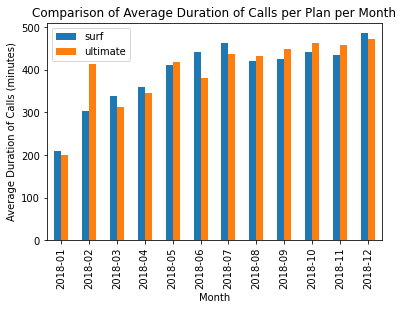

In [30]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.

# group the data by month, plan, and calculate the average duration of calls
grouped_data = final_df.groupby(['month', 'plan_name'])['total_duration'].mean().reset_index()

# use pivot_table() to reshape the data
pivoted_data = grouped_data.pivot_table(index='month', columns='plan_name', values='total_duration')
print(pivoted_data)

# plot the data as a bar chart
pivoted_data.plot(
    kind='bar',
    title='Comparison of Average Duration of Calls per Plan per Month',
    xlabel='Month',
    ylabel='Average Duration of Calls (minutes)'

)

plt.legend(['surf', 'ultimate'])
plt.show()

There does not seem to be an obvious difference in plans regarding users' average call duration, but for both plans, the call duration increases more towards the the second half of the year.

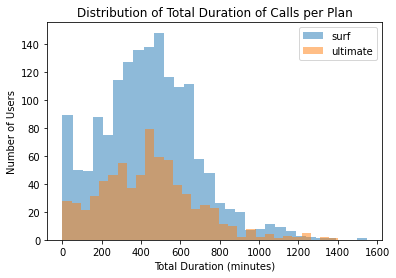

In [31]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# create two DataFrames for each plan
surf_df = final_df[final_df['plan_name'] == 'surf']
ultimate_df = final_df[final_df['plan_name'] == 'ultimate']

# create two histograms
plt.hist(surf_df['total_duration'], bins=30, alpha=0.5, label='surf')
plt.hist(ultimate_df['total_duration'], bins=30, alpha=0.5, label='ultimate')

plt.xlabel('Total Duration (minutes)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Duration of Calls per Plan')
plt.legend(['surf', 'ultimate'])
plt.show() 

Both plans exhibit a positive skew, which implies the mean is greater than the median. User behavior in both plans appear to be the same in that most users use around 400 minutes of call time, regardless of plan, but there are more customers on the Surf plan than the Ultimate plan.

In [32]:
# Calculate the mean and the variance of the monthly call duration
mean_var_df = final_df.groupby(['plan_name', 'month'])['total_duration'].agg(['mean', 'var']).reset_index()
print(mean_var_df)

   plan_name    month        mean           var
0       surf  2018-01  209.000000  16562.000000
1       surf  2018-02  304.555556  53925.777778
2       surf  2018-03  338.565217  37166.166008
3       surf  2018-04  360.720000  52940.164898
4       surf  2018-05  410.558442  62903.328776
5       surf  2018-06  442.577320  47635.225730
6       surf  2018-07  462.107438  64238.213361
7       surf  2018-08  421.500000  57386.425466
8       surf  2018-09  425.582474  49035.809225
9       surf  2018-10  441.502110  54995.234106
10      surf  2018-11  434.653710  54130.780367
11      surf  2018-12  486.481132  66762.906583
12  ultimate  2018-01  200.250000  17388.916667
13  ultimate  2018-02  414.142857  81259.809524
14  ultimate  2018-03  313.666667  65071.878788
15  ultimate  2018-04  345.333333  36720.433333
16  ultimate  2018-05  417.862069  46095.408867
17  ultimate  2018-06  380.978723  44884.499537
18  ultimate  2018-07  438.406780  76352.004091
19  ultimate  2018-08  433.507042  56583

Comparing the means between the two plans, we see that the mean call duration for Ultimate plan customers is generally higher than for Surf plan customers, although there are some months where the opposite is true.

Comparing the variances between the two plans, we can see that the variance of the call duration for Ultimate plan customers is generally slightly higher than for Surf plan customers.

Based on these observations, we can conclude that there are some differences in the behavior of customers on the two plans for their calls. Ultimate plan customers tend to have longer and more variable call durations compared to Surf plan customers.

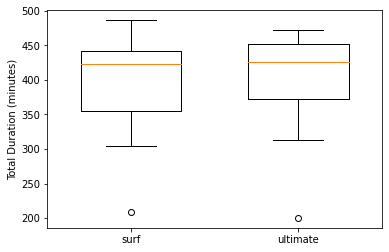

In [33]:
# Plot a boxplot to visualize the distribution of the monthly call duration

surf_data = grouped_data[grouped_data['plan_name'] == 'surf']
ultimate_data = grouped_data[grouped_data['plan_name'] == 'ultimate']

fig, ax = plt.subplots()

ax.boxplot(surf_data['total_duration'], positions=[1], widths=0.6, labels=['surf'])
ax.boxplot(ultimate_data['total_duration'], positions=[2], widths=0.6, labels=['ultimate'])

ax.set_ylabel('Total Duration (minutes)')

plt.show()

The box plots show that use behavior between the two plans are relatively similar. Their medians appear to be almost the same, only the first quartile for the Surf plan is larger as well as the range being slightly bigger than that of the Ultimate plan for total call duration.

## Messages <a id='messages'></a>

   plan_name    month   messages
0       surf  2018-01  10.500000
1       surf  2018-02  12.000000
2       surf  2018-03  15.260870
3       surf  2018-04  17.400000
4       surf  2018-05  24.012987
5       surf  2018-06  25.298969
6       surf  2018-07  27.033058
7       surf  2018-08  28.777778
8       surf  2018-09  30.762887
9       surf  2018-10  33.839662
10      surf  2018-11  32.385159
11      surf  2018-12  38.600629
12  ultimate  2018-01  15.500000
13  ultimate  2018-02  21.571429
14  ultimate  2018-03  20.250000
15  ultimate  2018-04  22.047619
16  ultimate  2018-05  32.103448
17  ultimate  2018-06  29.340426
18  ultimate  2018-07  32.830508
19  ultimate  2018-08  38.478873
20  ultimate  2018-09  37.895349
21  ultimate  2018-10  39.443396
22  ultimate  2018-11  38.606299
23  ultimate  2018-12  45.006623
plan_name       surf   ultimate
month                          
2018-01    10.500000  15.500000
2018-02    12.000000  21.571429
2018-03    15.260870  20.250000
2018-04    17.4

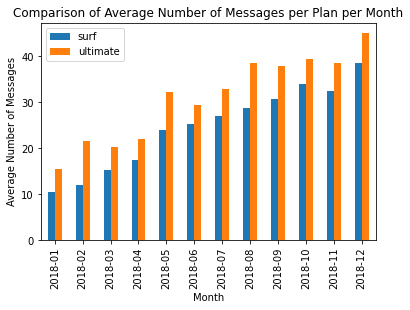

In [34]:
# Compare the number of messages users of each plan tend to send each month
plan_messages = final_df.groupby(['plan_name', 'month'])['messages'].mean().reset_index()
print(plan_messages)

# use pivot_table() to reshape the data
pivoted_data_msg = plan_messages.pivot_table(index='month', columns='plan_name', values='messages')
print(pivoted_data_msg)

# plot the data as a bar chart
pivoted_data_msg.plot(
    kind='bar',
    title='Comparison of Average Number of Messages per Plan per Month',
    xlabel='Month',
    ylabel='Average Number of Messages'

)

plt.legend(['surf', 'ultimate'])
plt.show()

Users for the Ultimate plan have a higher average number of messages for every month than those with the Surf plan. However with both plans, there is an increase in average number of messages later in the year.

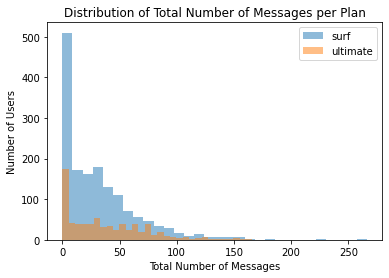

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# create two histograms
plt.hist(surf_df['messages'], bins=30, alpha=0.5, label='surf')
plt.hist(ultimate_df['messages'], bins=30, alpha=0.5, label='ultimate')

plt.xlabel('Total Number of Messages')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Number of Messages per Plan')
plt.legend(['surf', 'ultimate'])
plt.show() 

Both plans exhibit a positive skew, which implies the mean is greater than the median. User behavior in both plans appear to be the same in that most users send less than 50 messages, regardless of plan, but there are more customers on the Surf plan than the Ultimate plan.

In [36]:
# Calculate the mean and the variance of the monthly call duration
mean_var_df_msg = final_df.groupby(['plan_name', 'month'])['messages'].agg(['mean', 'var']).reset_index()
print(mean_var_df)

   plan_name    month        mean           var
0       surf  2018-01  209.000000  16562.000000
1       surf  2018-02  304.555556  53925.777778
2       surf  2018-03  338.565217  37166.166008
3       surf  2018-04  360.720000  52940.164898
4       surf  2018-05  410.558442  62903.328776
5       surf  2018-06  442.577320  47635.225730
6       surf  2018-07  462.107438  64238.213361
7       surf  2018-08  421.500000  57386.425466
8       surf  2018-09  425.582474  49035.809225
9       surf  2018-10  441.502110  54995.234106
10      surf  2018-11  434.653710  54130.780367
11      surf  2018-12  486.481132  66762.906583
12  ultimate  2018-01  200.250000  17388.916667
13  ultimate  2018-02  414.142857  81259.809524
14  ultimate  2018-03  313.666667  65071.878788
15  ultimate  2018-04  345.333333  36720.433333
16  ultimate  2018-05  417.862069  46095.408867
17  ultimate  2018-06  380.978723  44884.499537
18  ultimate  2018-07  438.406780  76352.004091
19  ultimate  2018-08  433.507042  56583

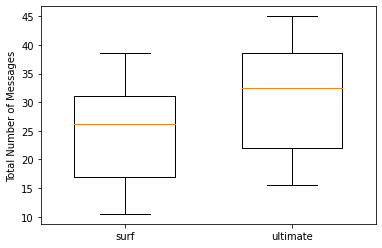

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration

surf_data_msg = plan_messages[plan_messages['plan_name'] == 'surf']
ultimate_data_msg = plan_messages[plan_messages['plan_name'] == 'ultimate']

fig, ax = plt.subplots()

ax.boxplot(surf_data_msg['messages'], positions=[1], widths=0.6, labels=['surf'])
ax.boxplot(ultimate_data_msg['messages'], positions=[2], widths=0.6, labels=['ultimate'])

ax.set_ylabel('Total Number of Messages')

plt.show()

The median line of the Ultimate box plot lies outside of the box of the Surf box plot, thus there is likely to be a difference between the two groups. For both plans the first quartile range is larger, but the entire plot for Ultimate is shifted higher than that of Surf, showing that users of the Ultimate plan send more messages than Surf.

## Internet <a id='internet'></a>

   plan_name    month     mb_used  traffic_gb
0       surf  2018-01     9749.72        10.0
1       surf  2018-02   109609.59       110.0
2       surf  2018-03   306945.12       312.0
3       surf  2018-04   599210.15       611.0
4       surf  2018-05  1073099.33      1087.0
5       surf  2018-06  1484248.33      1502.0
6       surf  2018-07  2030815.67      2042.0
7       surf  2018-08  2720843.68      2735.0
8       surf  2018-09  3218737.67      3238.0
9       surf  2018-10  4102786.41      4126.0
10      surf  2018-11  4624009.00      4650.0
11      surf  2018-12  5766125.26      5800.0
12  ultimate  2018-01    27672.37        29.0
13  ultimate  2018-02   119901.66       121.0
14  ultimate  2018-03   219858.22       221.0
15  ultimate  2018-04   338554.75       343.0
16  ultimate  2018-05   482109.99       489.0
17  ultimate  2018-06   720882.29       725.0
18  ultimate  2018-07   964339.92       973.0
19  ultimate  2018-08  1264845.13      1267.0
20  ultimate  2018-09  1459408.78 

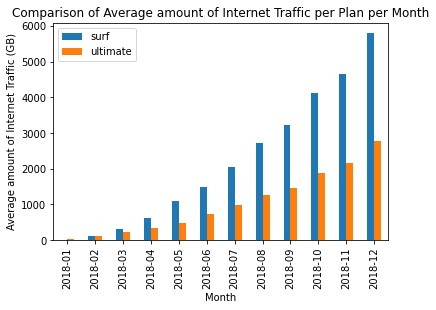

In [38]:
# Compare the amount of internet traffic consumed by users per plan
monthly_data_usage = final_df.groupby(['plan_name', 'month'])[['mb_used', 'traffic_gb']].sum()
monthly_data_usage = monthly_data_usage.reset_index()
print(monthly_data_usage)

# use pivot_table() to reshape the data
pivoted_data_internet = monthly_data_usage.pivot_table(index='month', columns='plan_name', values='traffic_gb')
print(pivoted_data_internet)

# plot the data as a bar chart
pivoted_data_internet.plot(
    kind='bar',
    title='Comparison of Average amount of Internet Traffic per Plan per Month',
    xlabel='Month',
    ylabel='Average amount of Internet Traffic (GB)'

)

plt.legend(['surf', 'ultimate'])
plt.show()

Users for the Surf plan have a higher average number amount of internet traffic for every month than those with the Ultimate plan. However with both plans, there is an increase in average amount of internet traffic later in the year.

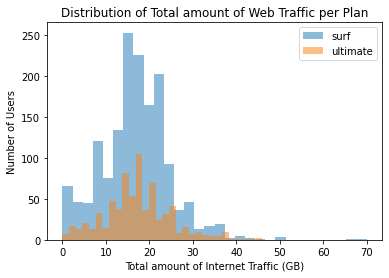

In [39]:
# Compare the amount of traffic users of each plan require each month. Plot a histogram.

# create two histograms
plt.hist(surf_df['traffic_gb'], bins=30, alpha=0.5, label='surf')
plt.hist(ultimate_df['traffic_gb'], bins=30, alpha=0.5, label='ultimate')

plt.xlabel('Total amount of Internet Traffic (GB)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total amount of Web Traffic per Plan')
plt.legend(['surf', 'ultimate'])
plt.show() 

Both plans exhibit a positive skew, which implies the mean is greater than the median. User behavior in both plans appear to be the same in that most users use around 20 GB of data, regardless of plan, but there are more customers on the Surf plan than the Ultimate plan.

In [40]:
# Calculate the mean and the variance of the monthly call duration
mean_var_df_internet = final_df.groupby(['plan_name', 'month'])['traffic_gb'].agg(['mean', 'var']).reset_index()
print(mean_var_df_internet)

   plan_name    month       mean         var
0       surf  2018-01   5.000000   18.000000
1       surf  2018-02  12.222222   41.444444
2       surf  2018-03  13.565217   63.984190
3       surf  2018-04  12.220000   56.215918
4       surf  2018-05  14.116883   58.183527
5       surf  2018-06  15.484536   47.752363
6       surf  2018-07  16.876033   61.476171
7       surf  2018-08  16.882716   71.420942
8       surf  2018-09  16.690722   49.240639
9       surf  2018-10  17.409283   60.725846
10      surf  2018-11  16.431095   54.607824
11      surf  2018-12  18.238994   69.210841
12  ultimate  2018-01   7.250000   14.916667
13  ultimate  2018-02  17.285714   37.904762
14  ultimate  2018-03  18.416667  138.628788
15  ultimate  2018-04  16.333333   85.833333
16  ultimate  2018-05  16.862069   54.194581
17  ultimate  2018-06  15.425532   68.858464
18  ultimate  2018-07  16.491525   64.254237
19  ultimate  2018-08  17.845070   58.047082
20  ultimate  2018-09  17.011628   47.258687
21  ultima

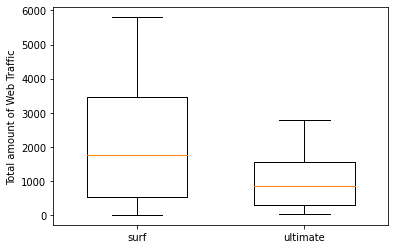

In [41]:
# Plot a boxplot to visualize the distribution of the monthly call duration

surf_data_internet = monthly_data_usage[monthly_data_usage['plan_name'] == 'surf']
ultimate_data_internet = monthly_data_usage[monthly_data_usage['plan_name'] == 'ultimate']

fig, ax = plt.subplots()

ax.boxplot(surf_data_internet['traffic_gb'], positions=[1], widths=0.6, labels=['surf'])
ax.boxplot(ultimate_data_internet['traffic_gb'], positions=[2], widths=0.6, labels=['ultimate'])

ax.set_ylabel('Total amount of Web Traffic')

plt.show()

The box plots show that use behavior between the two plans are different. The median for amount of internet traffic for those in the Surf plan is higher and has a much larger range, almost double as that of those on the Ultimate plan.

## Revenue <a id='revenue'></a>

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

   plan_name    month   revenue
0       surf  2018-01     40.00
1       surf  2018-02    300.24
2       surf  2018-03   1040.39
3       surf  2018-04   1982.61
4       surf  2018-05   3539.66
5       surf  2018-06   4624.49
6       surf  2018-07   7317.58
7       surf  2018-08  10089.19
8       surf  2018-09  11026.09
9       surf  2018-10  15079.58
10      surf  2018-11  15919.64
11      surf  2018-12  21631.46
12  ultimate  2018-01    280.00
13  ultimate  2018-02    490.00
14  ultimate  2018-03    896.00
15  ultimate  2018-04   1533.00
16  ultimate  2018-05   2051.00
17  ultimate  2018-06   3367.00
18  ultimate  2018-07   4242.00
19  ultimate  2018-08   5173.00
20  ultimate  2018-09   6195.00
21  ultimate  2018-10   7665.00
22  ultimate  2018-11   9107.00
23  ultimate  2018-12  11067.00
plan_name      surf  ultimate
month                        
2018-01       40.00     280.0
2018-02      300.24     490.0
2018-03     1040.39     896.0
2018-04     1982.61    1533.0
2018-05     3539.66 

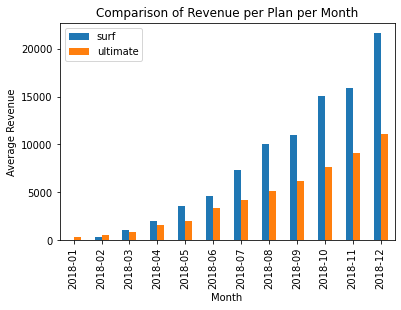

In [42]:
# Compare the amount of revenue consumed by users per plan
revenue = final_df.groupby(['plan_name', 'month'])[['revenue']].sum()
revenue = revenue.reset_index()
print(revenue)

# use pivot_table() to reshape the data
pivoted_data_revenue = revenue.pivot_table(index='month', columns='plan_name', values='revenue')
print(pivoted_data_revenue)

# plot the data as a bar chart
pivoted_data_revenue.plot(
    kind='bar',
    title='Comparison of Revenue per Plan per Month',
    xlabel='Month',
    ylabel='Average Revenue'

)

plt.legend(['surf', 'ultimate'])
plt.show()

Users for the Surf plan have a higher average revenue for every month than those with the Ultimate plan. However with both plans, there is an increase in average amount of revenue later in the year.

In [43]:
# Calculate the mean and the variance of the monthly revenue
mean_var_df_rev = final_df.groupby(['plan_name', 'month'])['revenue'].agg(['mean', 'var', 'median']).reset_index()
print(mean_var_df_rev)

   plan_name    month       mean          var  median
0       surf  2018-01  20.000000     0.000000   20.00
1       surf  2018-02  33.360000   449.206400   20.24
2       surf  2018-03  45.234348  1489.651098   20.00
3       surf  2018-04  39.652200  1198.121352   20.00
4       surf  2018-05  45.969610  1885.770970   20.00
5       surf  2018-06  47.675155  1923.268538   30.00
6       surf  2018-07  60.475868  2800.107781   40.00
7       surf  2018-08  62.278951  3479.524052   40.00
8       surf  2018-09  56.835515  2228.765394   40.00
9       surf  2018-10  63.626920  3096.703024   50.00
10      surf  2018-11  56.253145  2448.453600   40.00
11      surf  2018-12  68.023459  4458.748599   50.00
12  ultimate  2018-01  70.000000     0.000000   70.00
13  ultimate  2018-02  70.000000     0.000000   70.00
14  ultimate  2018-03  74.666667   145.515152   70.00
15  ultimate  2018-04  73.000000   120.400000   70.00
16  ultimate  2018-05  70.724138    15.206897   70.00
17  ultimate  2018-06  71.63

For both plans, the mean and median are very similar, inferring that the data is not heavily skewed. The variance generally higher for Surf plan than that of the Ultimate plan, meaning that the data is more spread out than the Ultimate plan.

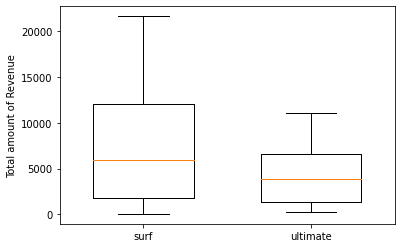

In [44]:
# Plot a boxplot to visualize the distribution of the monthly revenue

surf_data_revenue = revenue[revenue['plan_name'] == 'surf']
ultimate_data_revenue = revenue[revenue['plan_name'] == 'ultimate']

fig, ax = plt.subplots()

ax.boxplot(surf_data_revenue['revenue'], positions=[1], widths=0.6, labels=['surf'])
ax.boxplot(ultimate_data_revenue['revenue'], positions=[2], widths=0.6, labels=['ultimate'])

ax.set_ylabel('Total amount of Revenue')

plt.show()

The box plots show that use behavior between the two plans are different. The median for amount of revenue for those in the Surf plan is higher and has a much larger range, almost double as that of those on the Ultimate plan.

# Test statistical hypotheses <a id='hypothesis'></a>

Null hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans is equal.

Alternative hypothesis (HA): The average revenue from users of the Ultimate and Surf calling plans is not equal.

We can test this hypothesis using a two-sample t-test because we're comparing the means of two independent samples.

In [45]:
# Test the hypotheses
    
ultimate_revenue = final_df[final_df['plan_name']=='ultimate']['revenue']
surf_revenue = final_df[final_df['plan_name']=='surf']['revenue']

alpha = 0.05

results = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=True)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject to reject the null hypothesis")

p-value:  7.040478272322767e-11
We reject the null hypothesis


If we can't reject the null hypothesis that the average revenue from users of the Ultimate and Surf calling plans is equal, it means that we don't have enough evidence to conclude that the average revenue of the two calling plans is different. This does not necessarily mean that the two calling plans have the same revenue, but rather that the difference between the two means is not statistically significant at the chosen level of significance (alpha value).

In other words, we cannot conclude that there is a significant difference between the revenue generated by the Ultimate and Surf calling plans based on the sample data we have. It is possible that the difference in revenue between the two plans exists in the population, but we cannot detect it with the current sample data. Therefore, we would need to collect more data to increase our sample size and improve the accuracy of our analysis.

Null Hypothesis (H0): The mean revenue from users in the NY-NJ area is equal to the mean revenue from users in other regions.

Alternative Hypothesis (HA): The mean revenue from users in the NY-NJ area is different from the mean revenue from users in other regions.

We can test this hypothesis using a two-sample t-test because we're comparing the means of two independent samples.

In [46]:
# Test the hypotheses

ny_nj_users = final_df[final_df['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]
other_users = final_df[~final_df['city'].isin(['New York-Newark-Jersey City, NY-NJ-PA MSA'])]

alpha = 0.05

results = st.ttest_ind(ny_nj_users['revenue'], other_users['revenue'], equal_var=False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject to reject the null hypothesis")

p-value:  0.028765503550625456
We reject the null hypothesis


If we can't reject the null hypothesis, it means the observed difference in average revenue between users in the NY-NJ area and users in other regions is not statistically significant. This suggests that the difference in revenue is likely due to chance or random variation, and it is unlikely that there is a real difference in behavior between users in these two groups.

If we cannot reject the null hypothesis, we cannot conclude that there is evidence to support the alternative hypothesis, which in this case would be that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

# General conclusion <a id='conclusion'></a>

Based on the given data of the populations for both plans, calling behavior is similar for both plans. Those on the Ultimate plan send more messages than those with the Surf plan, but those on the Surf plan have higher internet traffic and revenue.

However, based on the results when testing the hypothesis if the two plans have equal revenue, it was determined that we cannot conclude that there is a significant difference between the revenue generated by the Ultimate and Surf calling plans based on the sample data we have. Discrepancies may be due to population since from the provided data more users were on the Surf plan than the Ultimate plan.

After testing the second hypothesis if there was a difference in revenue based on region, it was determined that it is not statistically significant and any differences are mostl likely random variation.

More data would need to be collected to increase our sample size and improve the accuracy of our analysis.